In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

In [64]:
# URL of the dataset
# data_url = 'https://data.cityofchicago.org/resource/ijzp-q8t2.csv?$limit=1100000'
# df = pd.read_csv(data_url)

# Read Dataset from local version to make sure we get same data everytime.
file_path = "../Chicago_data.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(len(df))

1100000


In [65]:
df.head()

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,13777896,JJ183487,2025-03-16T03:00:00.000,040XX N KEYSTONE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,39.0,16.0,08B,1148566.0,1926623.0,2025,2025-03-19T15:41:08.000,41.954594,-87.729245,"\n, \n(41.954593897, -87.729244692)"
1,13776543,JJ182816,2025-03-12T00:00:00.000,037XX W NORTH AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,26.0,23.0,07,1151340.0,1910377.0,2025,2025-03-19T15:42:01.000,41.909959,-87.719475,"\n, \n(41.909959416, -87.719474573)"
2,13772937,JJ178623,2025-03-12T00:00:00.000,076XX S EAST END AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,8.0,43.0,11,1188860.0,1854711.0,2025,2025-03-19T15:42:01.000,41.756389,-87.583428,"\n, \n(41.756389436, -87.583428355)"
3,13774108,JJ179898,2025-03-12T00:00:00.000,097XX S MERRILL AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,7.0,51.0,07,1192381.0,1840724.0,2025,2025-03-19T15:42:01.000,41.717923,-87.570979,"\n, \n(41.717922891, -87.570978883)"
4,13772980,JJ178262,2025-03-12T00:00:00.000,095XX S HALSTED ST,0560,ASSAULT,SIMPLE,LIBRARY,False,False,...,21.0,73.0,08A,1172656.0,1841600.0,2025,2025-03-19T15:42:01.000,41.720783,-87.643198,"\n, \n(41.720783347, -87.643197739)"


In [66]:
# Check Date Range
min_date = df['date'].min()
max_date = df['date'].max()

print(f"Minimum Date: {min_date}")
print(f"Maximum Date: {max_date}")

Minimum Date: 2020-07-31T17:29:00.000
Maximum Date: 2025-03-16T03:00:00.000


In [67]:
# Filter the DataFrame to include only rows before 2025
df = df[(df['date'] < '2025-01-01') & (df['date'] >= '2021-01-01')]
# Display the first few rows of the filtered DataFrame
print(len(df))
df.head()

969756


,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
40460,13709672,JJ101940,2024-12-31T23:58:00.000,014XX E 68TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,...,5.0,43.0,14,1186817.0,1860189.0,2024,2025-01-08T15:42:09.000,41.771470,-87.590742,"\n, \n(41.771470188, -87.59074212)"
40461,13707925,JJ100089,2024-12-31T23:56:00.000,047XX S DR MARTIN LUTHER KING JR DR,1365,CRIMINAL TRESPASS,TO RESIDENCE,APARTMENT,True,True,...,3.0,38.0,26,1179661.0,1873623.0,2024,2025-01-08T15:42:09.000,41.808501,-87.616563,"\n, \n(41.808500903, -87.616562762)"
40462,13708038,JJ100035,2024-12-31T23:55:00.000,077XX S CICERO AVE,0498,BATTERY,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...",HOTEL / MOTEL,False,True,...,18.0,70.0,04B,1145740.0,1853048.0,2024,2025-01-08T15:42:09.000,41.752749,-87.741498,"\n, \n(41.752748627, -87.741497836)"
40463,13709164,JJ101392,2024-12-31T23:53:00.000,066XX S GREENWOOD AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,20.0,42.0,14,1184362.0,1861188.0,2024,2025-01-08T15:42:09.000,41.774269,-87.599710,"\n, \n(41.774269351, -87.599709962)"
40464,13707823,JJ100020,2024-12-31T23:50:00.000,012XX N MENARD AVE,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,29.0,25.0,08B,1137458.0,1907694.0,2024,2025-01-08T15:42:09.000,41.902858,-87.770537,"\n, \n(41.902858242, -87.770536741)"


In [68]:
# Check columns names
df.columns

Index(['id', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location'],
      dtype='object')

In [69]:
# Basic Data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 969756 entries, 40460 to 1010215
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    969756 non-null  int64  
 1   case_number           969756 non-null  object 
 2   date                  969756 non-null  object 
 3   block                 969756 non-null  object 
 4   iucr                  969756 non-null  object 
 5   primary_type          969756 non-null  object 
 6   description           969756 non-null  object 
 7   location_description  965081 non-null  object 
 8   arrest                969756 non-null  bool   
 9   domestic              969756 non-null  bool   
 10  beat                  969756 non-null  int64  
 11  district              969756 non-null  int64  
 12  ward                  969732 non-null  float64
 13  community_area        969754 non-null  float64
 14  fbi_code              969756 non-null  object 
 15  

In [70]:
df.describe()

,id,beat,district,ward,community_area,x_coordinate,y_coordinate,year,latitude,longitude
count,9.697560e+05,969756.000000,969756.000000,969732.000000,969754.000000,9.566080e+05,9.566080e+05,969756.000000,956608.000000,956608.000000
mean,1.295982e+07,1154.867757,11.319085,23.215057,36.427701,1.165284e+06,1.887043e+06,2022.586568,41.845629,-87.668954
std,8.047738e+05,707.449725,7.070334,14.021245,21.597863,1.645270e+04,3.189071e+04,1.098165,0.087704,0.059866
min,2.569900e+04,111.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,2021.000000,36.619446,-91.686566
25%,1.263788e+07,533.000000,5.000000,10.000000,22.000000,1.153849e+06,1.859437e+06,2022.000000,41.769671,-87.710544
50%,1.299809e+07,1033.000000,10.000000,24.000000,32.000000,1.167108e+06,1.893284e+06,2023.000000,41.862916,-87.662139
75%,1.335473e+07,1731.000000,17.000000,34.000000,53.000000,1.176784e+06,1.910189e+06,2024.000000,41.909422,-87.626897
max,1.377965e+07,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951506e+06,2024.000000,42.022549,-87.524529


In [71]:
# Check for missing values in the dataset.
display(df.isnull().sum())

id                          0
case_number                 0
date                        0
block                       0
iucr                        0
primary_type                0
description                 0
location_description     4675
arrest                      0
domestic                    0
beat                        0
district                    0
ward                       24
community_area              2
fbi_code                    0
x_coordinate            13148
y_coordinate            13148
year                        0
updated_on                  0
latitude                13148
longitude               13148
location                13148
dtype: int64

## Exploration and Visualization for Chicago Data

In [72]:
df['primary_type'].unique()

array(['CRIMINAL DAMAGE', 'CRIMINAL TRESPASS', 'BATTERY',
       'MOTOR VEHICLE THEFT', 'OTHER OFFENSE', 'WEAPONS VIOLATION',
       'ASSAULT', 'THEFT', 'DECEPTIVE PRACTICE',
       'CRIMINAL SEXUAL ASSAULT', 'ROBBERY',
       'CONCEALED CARRY LICENSE VIOLATION', 'BURGLARY', 'STALKING',
       'NARCOTICS', 'LIQUOR LAW VIOLATION', 'OFFENSE INVOLVING CHILDREN',
       'KIDNAPPING', 'HOMICIDE', 'ARSON', 'SEX OFFENSE',
       'INTERFERENCE WITH PUBLIC OFFICER', 'PUBLIC PEACE VIOLATION',
       'INTIMIDATION', 'GAMBLING', 'PROSTITUTION', 'OBSCENITY',
       'PUBLIC INDECENCY', 'HUMAN TRAFFICKING', 'NON-CRIMINAL',
       'OTHER NARCOTIC VIOLATION'], dtype=object)

In [73]:
df['primary_type'].value_counts()

primary_type
THEFT                                213544
BATTERY                              171717
CRIMINAL DAMAGE                      110965
ASSAULT                               87230
MOTOR VEHICLE THEFT                   82999
DECEPTIVE PRACTICE                    67647
OTHER OFFENSE                         61274
ROBBERY                               37057
WEAPONS VIOLATION                     34205
BURGLARY                              30151
NARCOTICS                             21597
CRIMINAL TRESPASS                     17294
OFFENSE INVOLVING CHILDREN             7190
CRIMINAL SEXUAL ASSAULT                6346
SEX OFFENSE                            4907
PUBLIC PEACE VIOLATION                 3153
HOMICIDE                               2767
INTERFERENCE WITH PUBLIC OFFICER       1980
ARSON                                  1947
STALKING                               1860
PROSTITUTION                            894
LIQUOR LAW VIOLATION                    770
CONCEALED CARRY LIC

During these 5 years, there are 31 types of crime in Chicago. 

Among them, the type with the highest crime rate is theft, the second is battery.

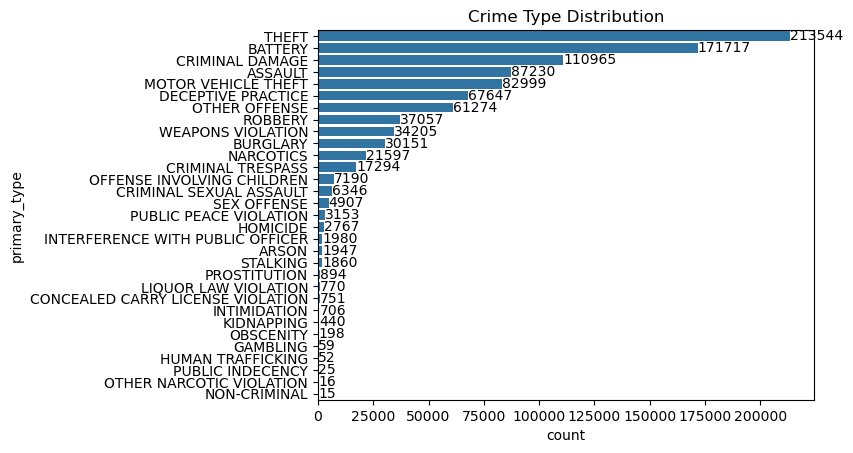

In [74]:
# Create the countplot
ax = sns.countplot(y=df["primary_type"], order=df["primary_type"].value_counts().index)
plt.title("Crime Type Distribution")

# Add value counts to the bars
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 2, p.get_y() + p.get_height() / 2, int(width), ha='left', va='center')

plt.show()

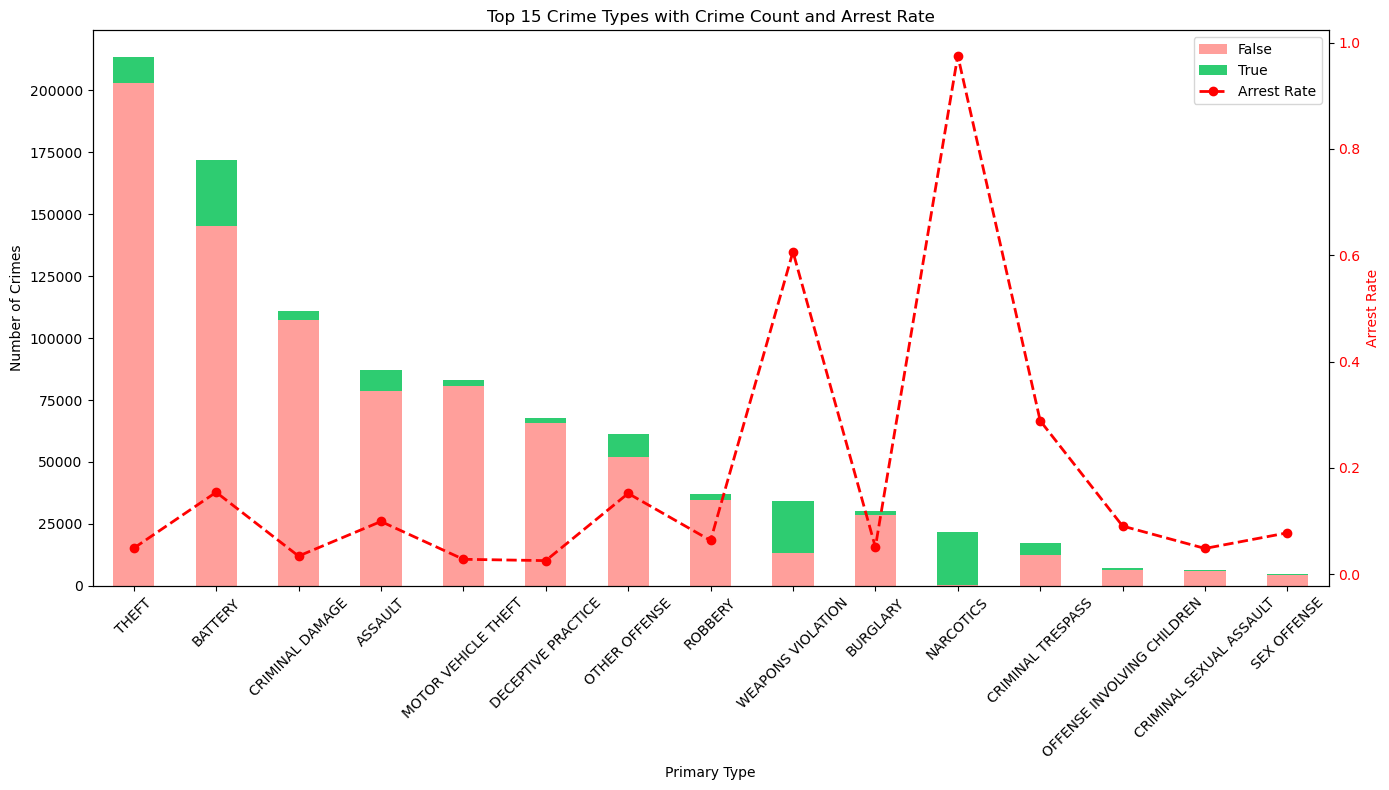

In [75]:
top_n = 15
top_types = df['primary_type'].value_counts().nlargest(top_n).index
df_top = df[df['primary_type'].isin(top_types)]

# summarize arrest rate
stacked_counts = df_top.groupby(['primary_type', 'arrest']).size().unstack(fill_value=0)
arrest_rate = stacked_counts[True] / (stacked_counts[True] + stacked_counts[False])


fig, ax1 = plt.subplots(figsize=(14, 8))

stacked_counts.loc[top_types].plot(kind='bar', stacked=True, ax=ax1, color = ['#ff9f9b', '#2ecc71'])
ax1.set_ylabel("Number of Crimes")
ax1.set_xlabel("Primary Type")
ax1.set_title("Top 15 Crime Types with Crime Count and Arrest Rate")
ax1.tick_params(axis='x', rotation=45)


ax2 = ax1.twinx()
ax2.plot(
    top_types,
    arrest_rate.loc[top_types],
    color='red',
    marker='o',
    linestyle='--',
    linewidth=2,
    label='Arrest Rate'
)
ax2.set_ylabel("Arrest Rate", color='red')
ax2.tick_params(axis='y', labelcolor='red')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

plt.tight_layout()
plt.show()


### Temporal Pattern Analysis

**Yearly Trend: A Rising Crime Rate**

Our analysis reveals a consistent year-over-year increase in crime incidents from 2020 to 2024. This upward trajectory suggests a worsening crime situation that demands urgent attention from authorities.

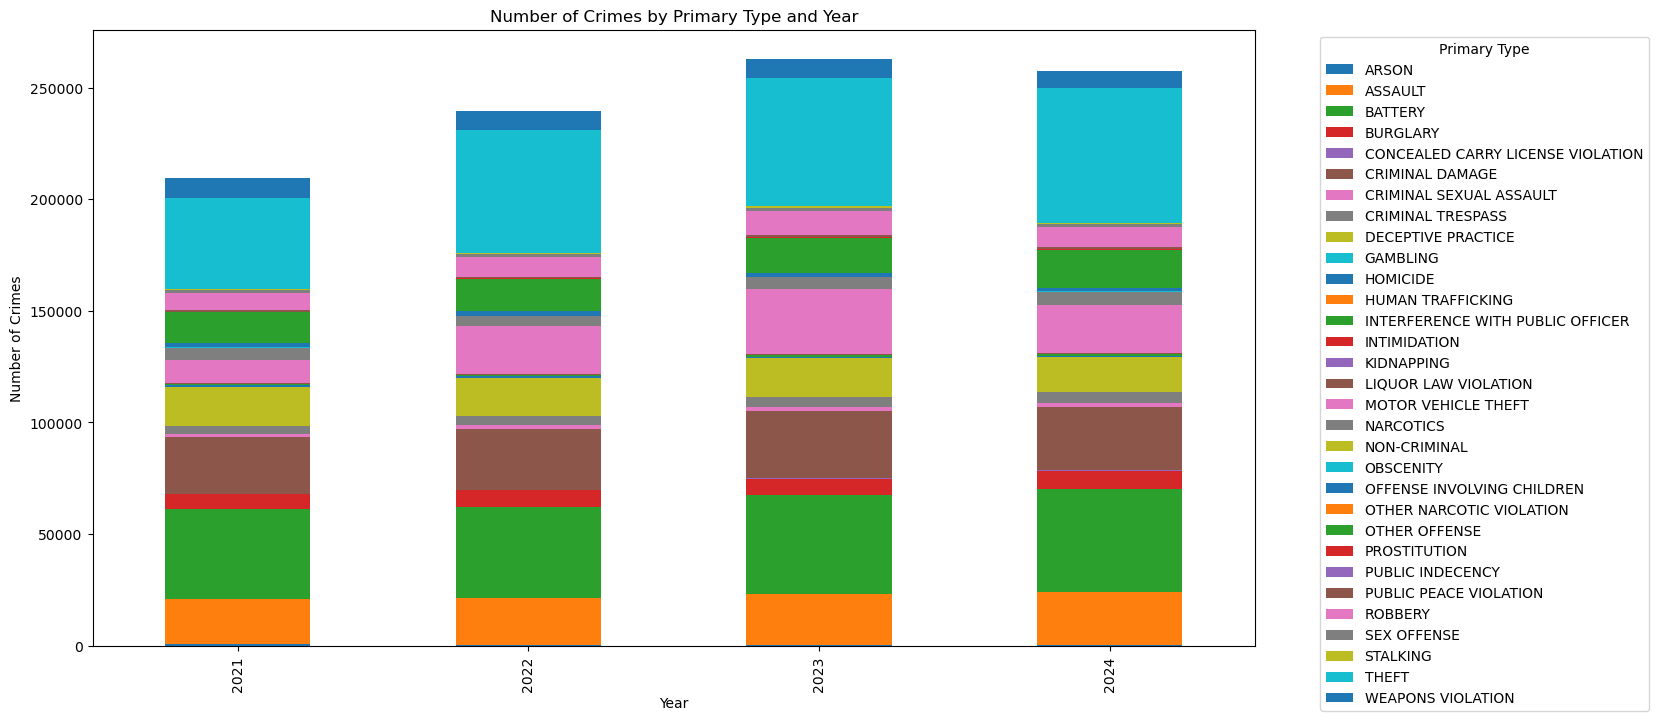

In [76]:
# Convert the 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the 'date' column
df['year'] = df['date'].dt.year

# Group the data by year and primary_type, and count the number of occurrences
crime_counts_by_year = df.groupby(['year', 'primary_type'])['primary_type'].count().unstack()

# Plot the stacked bar chart
ax = crime_counts_by_year.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes by Primary Type and Year')
plt.legend(title='Primary Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**Monthly Trend: Seasonal Fluctuations**

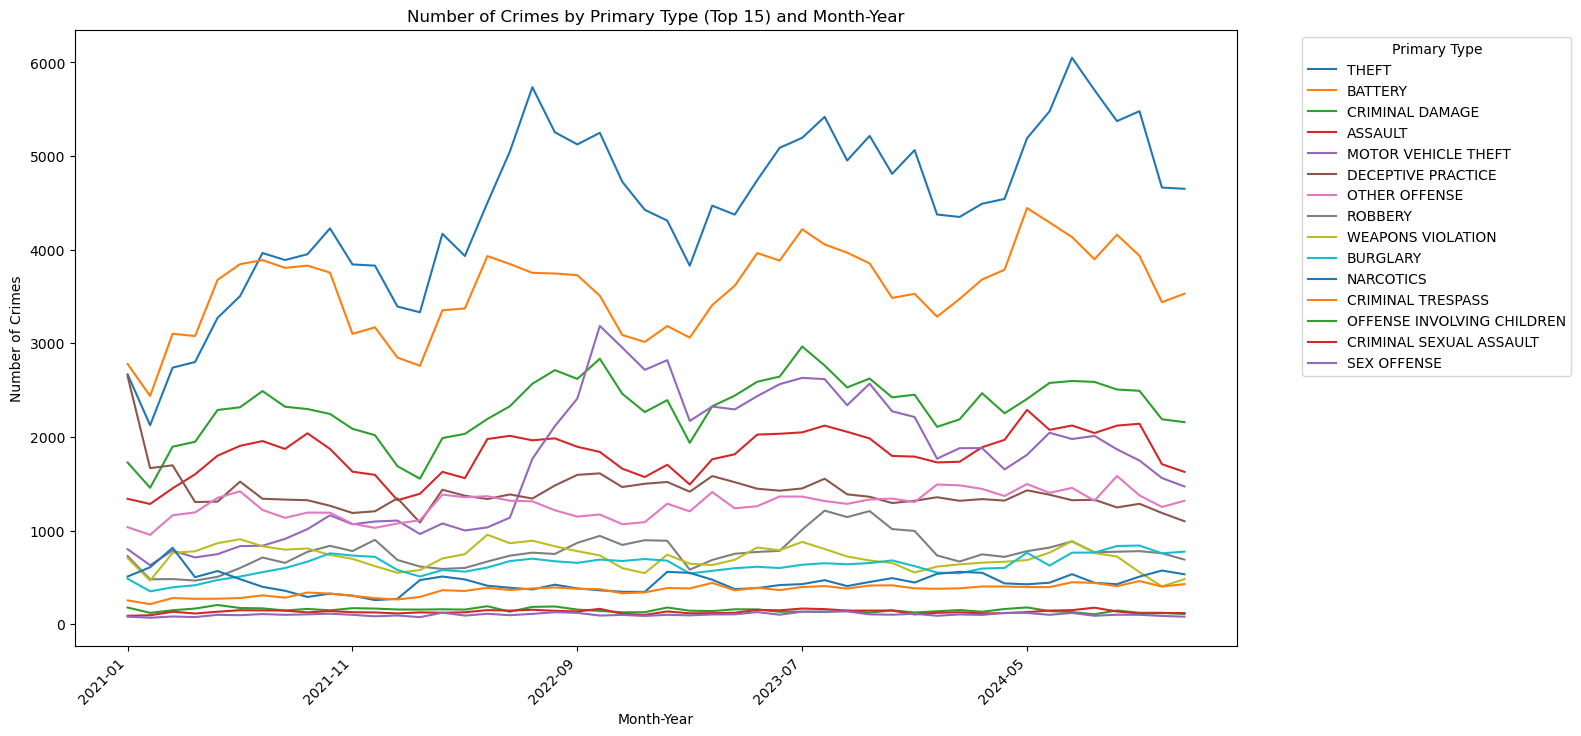

In [77]:

df['month_year'] = df['date'].dt.strftime('%Y-%m')

# Group by month_year and primary_type, then count occurrences
crime_counts_by_month_year = df.groupby(['month_year', 'primary_type'])['primary_type'].count().unstack()

# Get top 15 primary types
top_15_primary_types = df['primary_type'].value_counts().nlargest(15).index

# Filter the crime counts to include only the top 15 primary types
crime_counts_by_month_year = crime_counts_by_month_year[top_15_primary_types]

# Plot the line graph
ax = crime_counts_by_month_year.plot(kind='line', figsize=(15, 8))
plt.xlabel('Month-Year')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes by Primary Type (Top 15) and Month-Year')
plt.legend(title='Primary Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()


- **Summer Peak**: Crime rates consistently peak during summer months (June-August), with July showing the highest average incidents.

- **Winter Decline**: A notable decrease occurs during winter months (December-February), with February showing the lowest average incidents.

- **Holiday Season Spike**: Despite the winter decline, December shows a localized increase compared to November and January, likely due to holiday-related theft and fraud.

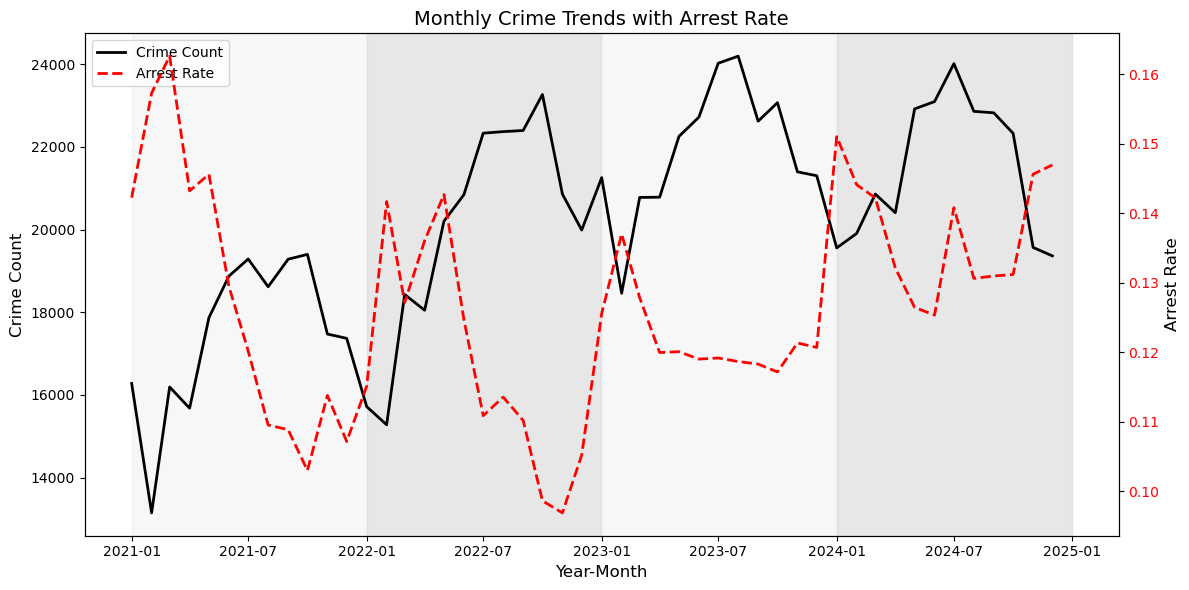

In [78]:
# Convert date column to datetime
data = df
data["date"] = pd.to_datetime(data["date"])

# Aggregate crime counts per month
data["YearMonth"] = data["date"].dt.to_period("M")
data["Year"] = data["date"].dt.year
crime_trends = data.groupby("YearMonth")["primary_type"].count()

# Aggregate arrest counts per month and year
monthly_stats = data.groupby("YearMonth").agg(
    total_crimes=("primary_type", "count"),
    arrested_count=("arrest", lambda x: (x == True).sum())
)

# calculate arrest rate
monthly_stats["arrest_rate"] = monthly_stats["arrested_count"] / monthly_stats["total_crimes"]

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(crime_trends.index.to_timestamp(), crime_trends.values, color="black", linewidth=2, label="Crime Count")
ax1.set_ylabel("Crime Count", fontsize=12)
ax1.tick_params(axis="y", labelcolor="black")


years = sorted(data["Year"].unique())
for i, year in enumerate(years):
    start = pd.to_datetime(f"{year}-01-01")
    end = pd.to_datetime(f"{year}-12-31")
    color = "#f0f0f0" if i % 2 == 0 else "#d0d0d0"  # Alternating shades
    ax1.axvspan(start, end, color=color, alpha=0.5)

ax2 = ax1.twinx()
ax2.plot(
    monthly_stats.index.to_timestamp(),
    monthly_stats["arrest_rate"],
    color="red",
    linestyle="--",
    linewidth=2,
    label="Arrest Rate"
)
ax2.set_ylabel("Arrest Rate", fontsize=12)
ax2.tick_params(axis="y", labelcolor="red")

ax1.set_title("Monthly Crime Trends with Arrest Rate", fontsize=14)
ax1.set_xlabel("Year-Month", fontsize=12)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

plt.tight_layout()
plt.show()

**Weekly Trend**


/var/folders/gv/4cnh8blj2mgcj1tbxqms_3yw0000gn/T/ipykernel_3015/1804930143.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['day_of_week'], order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], palette="coolwarm")


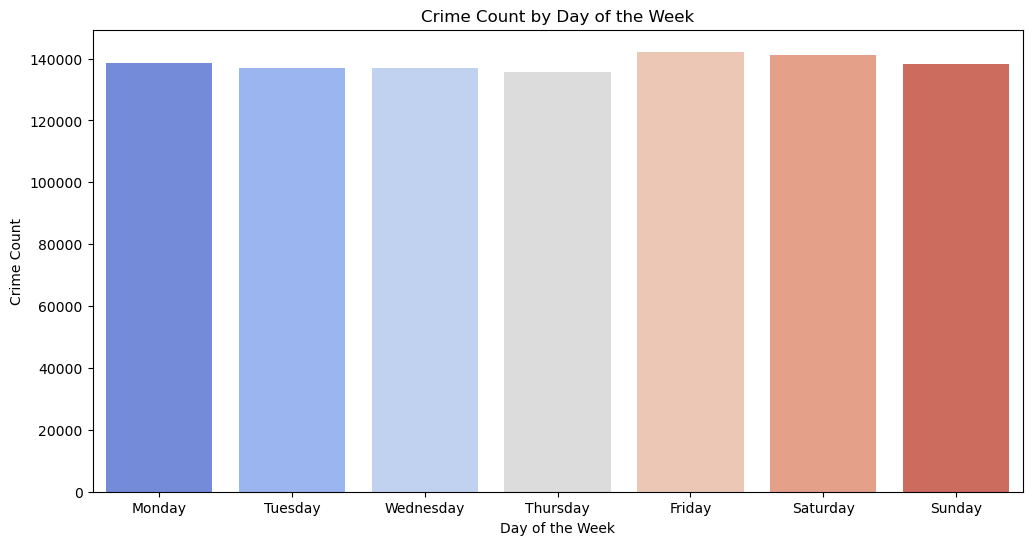

In [79]:
# Weekly Trend Of Crime
df['day_of_week'] = df['date'].dt.day_name()

plt.figure(figsize=(12,6))
sns.countplot(x=df['day_of_week'], order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], palette="coolwarm")
plt.title("Crime Count by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Crime Count")
plt.show()

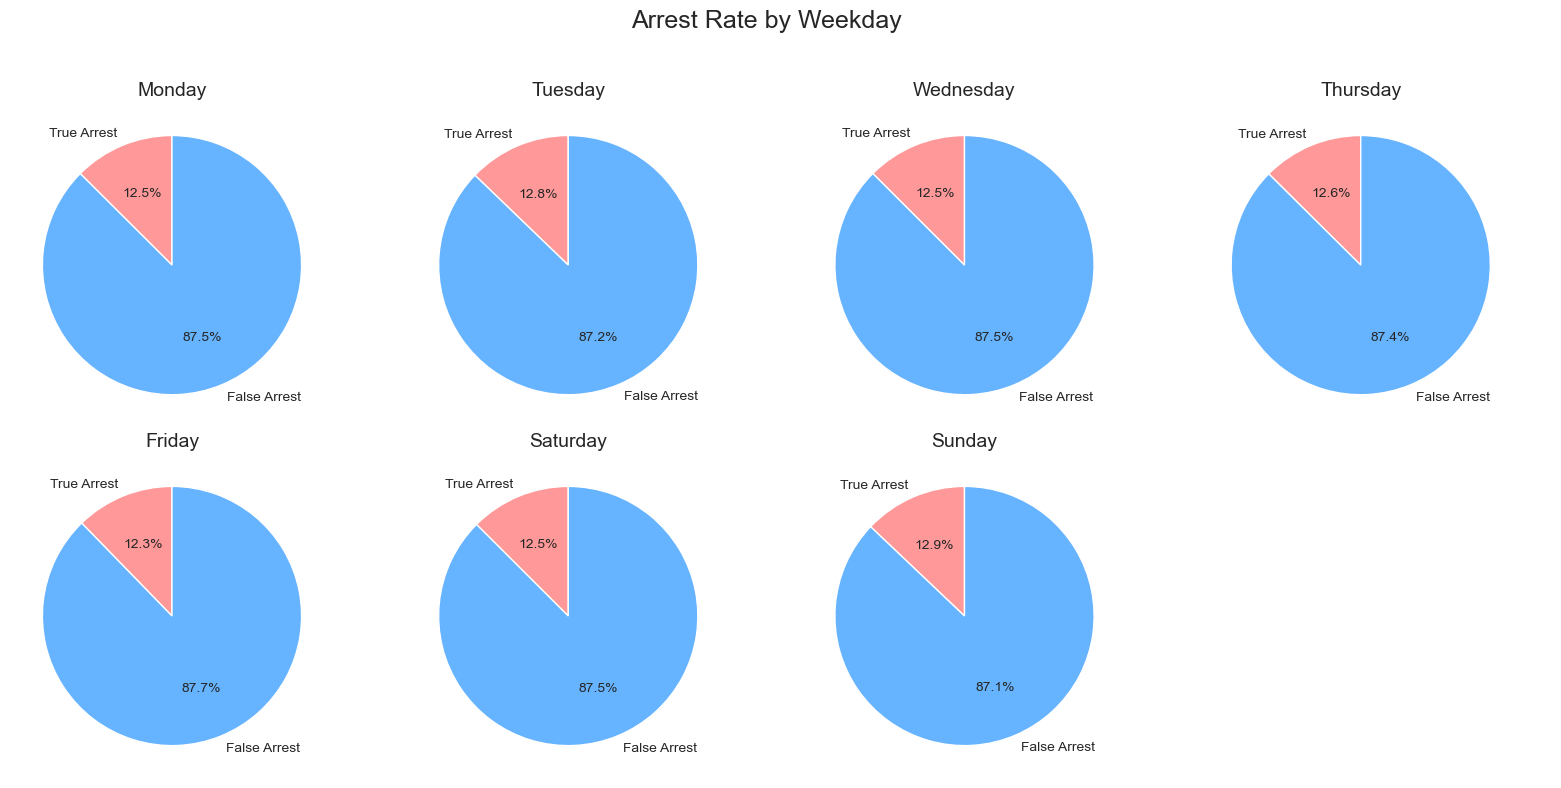

In [99]:

df['weekday'] = df['date'].dt.weekday

weekday_arrest_counts = df.groupby(['weekday', 'arrest']).size().unstack(fill_value=0)
weekday_arrest_counts = weekday_arrest_counts.reindex(columns=[True, False], fill_value=0)

labels = ['True Arrest', 'False Arrest']
colors = ['#ff9999', '#66b3ff']

weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i in range(7):
    data = weekday_arrest_counts.loc[i]
    axes[i].pie(
        data,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        textprops={'fontsize': 10}
    )
    axes[i].set_title(f'{weekday_names[i]}', fontsize=14)

axes[7].axis('off')

plt.suptitle('Arrest Rate by Weekday', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


**Will Holiday affect arrest rate?**

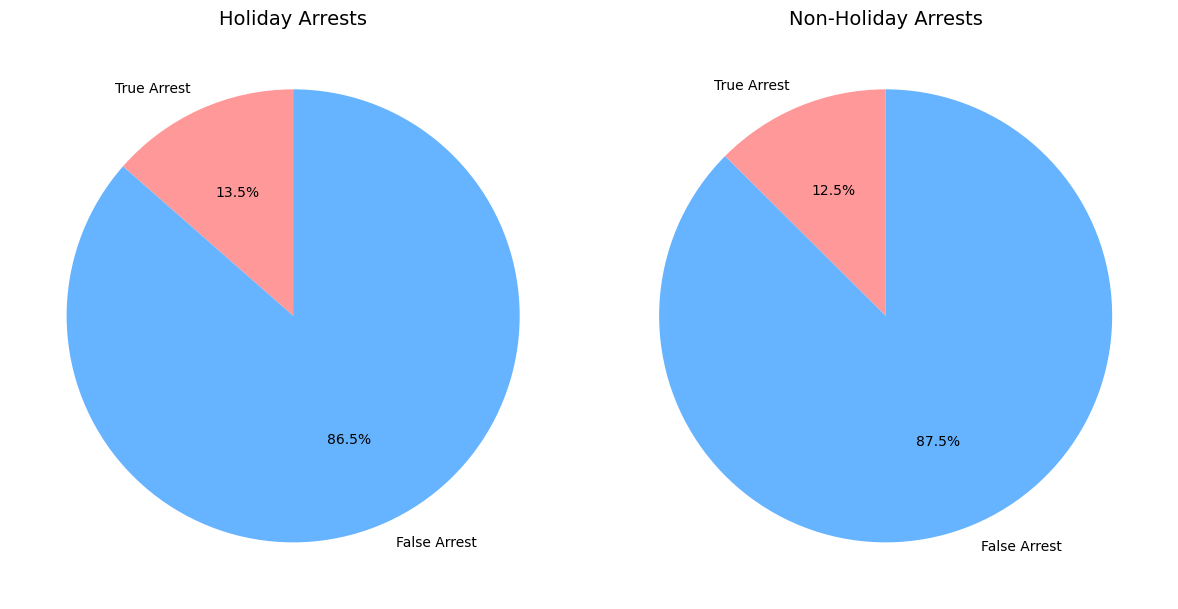

In [80]:
import holidays

us_holidays = holidays.US()
df['is_holiday'] = df['date'].dt.date.apply(lambda x: 1 if x in us_holidays else 0)

holiday_arrest_counts = (
    df.groupby(['is_holiday', 'arrest']).size().unstack(fill_value=0)
).reindex(columns=[True, False], fill_value=0)

holiday_data = holiday_arrest_counts.loc[1]
non_holiday_data = holiday_arrest_counts.loc[0]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

labels = ['True Arrest', 'False Arrest']
colors = ['#ff9999', '#66b3ff']

axes[0].pie(
    holiday_data, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors,
    textprops={'fontsize': 10}
)
axes[0].set_title('Holiday Arrests', fontsize=14)

axes[1].pie(
    non_holiday_data, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors,
    textprops={'fontsize': 10}
)
axes[1].set_title('Non-Holiday Arrests', fontsize=14)

plt.tight_layout()
plt.show()

**Daily Trend**

Crime incidents throughout the day follow a bi-modal distribution with:
- **Evening Peak** (3:00-8:00 PM): Highest concentration during afternoon/evening commute and early evening.
- **Midnight** (11:00 PM-1:00 AM) : Socializing at night can lead to high crime rates.

/var/folders/gv/4cnh8blj2mgcj1tbxqms_3yw0000gn/T/ipykernel_3015/2999920977.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['hour'], palette="coolwarm")


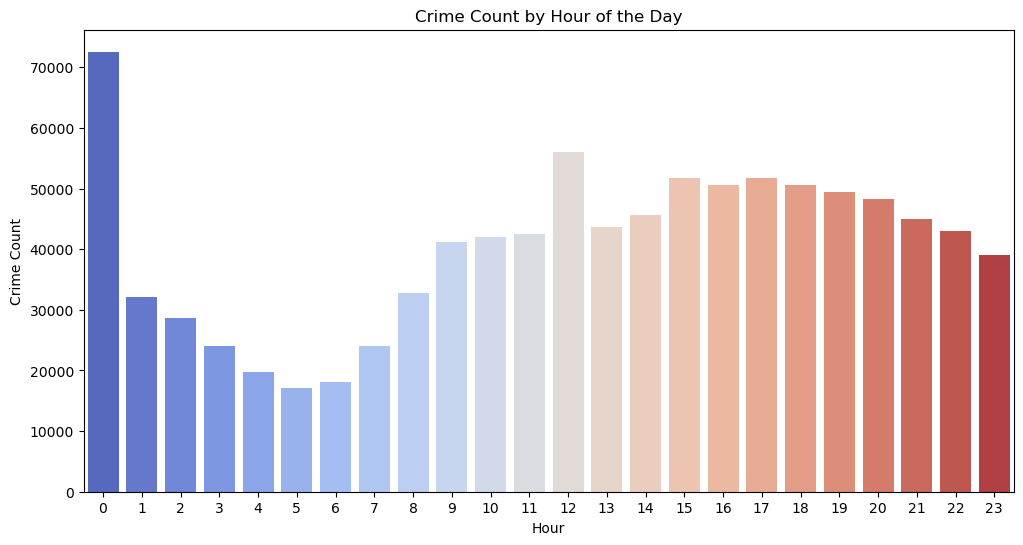

In [81]:
# Hourly Trend in 1 Day of Crime
df['hour'] = df['date'].dt.hour

plt.figure(figsize=(12,6))
sns.countplot(x=df['hour'], palette="coolwarm")
plt.title("Crime Count by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Crime Count")
plt.show()


/var/folders/gv/4cnh8blj2mgcj1tbxqms_3yw0000gn/T/ipykernel_3015/2044877540.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=arrest_rate, x='hour', y='arrest_rate', palette='coolwarm')


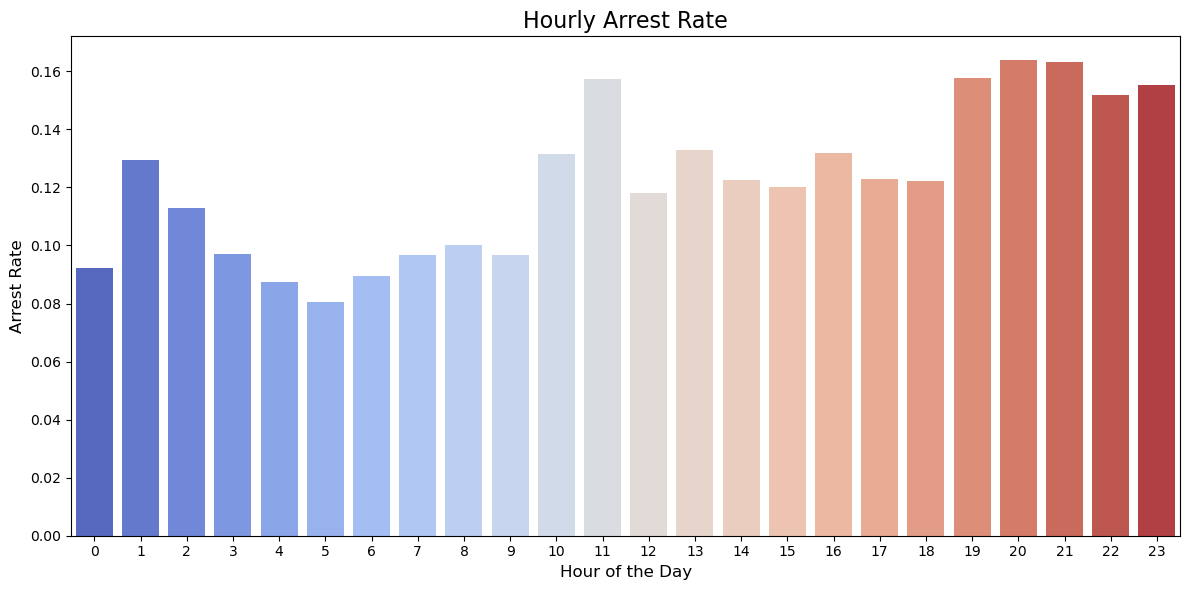

In [82]:
# calculate predict rate per hour
df['hour'] = df['date'].dt.hour
arrest_rate = df.groupby('hour')['arrest'].mean().reset_index()
arrest_rate.columns = ['hour', 'arrest_rate']

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=arrest_rate, x='hour', y='arrest_rate', palette='coolwarm')


plt.title('Hourly Arrest Rate', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Arrest Rate', fontsize=12)

plt.xticks(ticks=range(len(arrest_rate['hour'])), labels=arrest_rate['hour'], rotation=0)

plt.tight_layout()
plt.show()

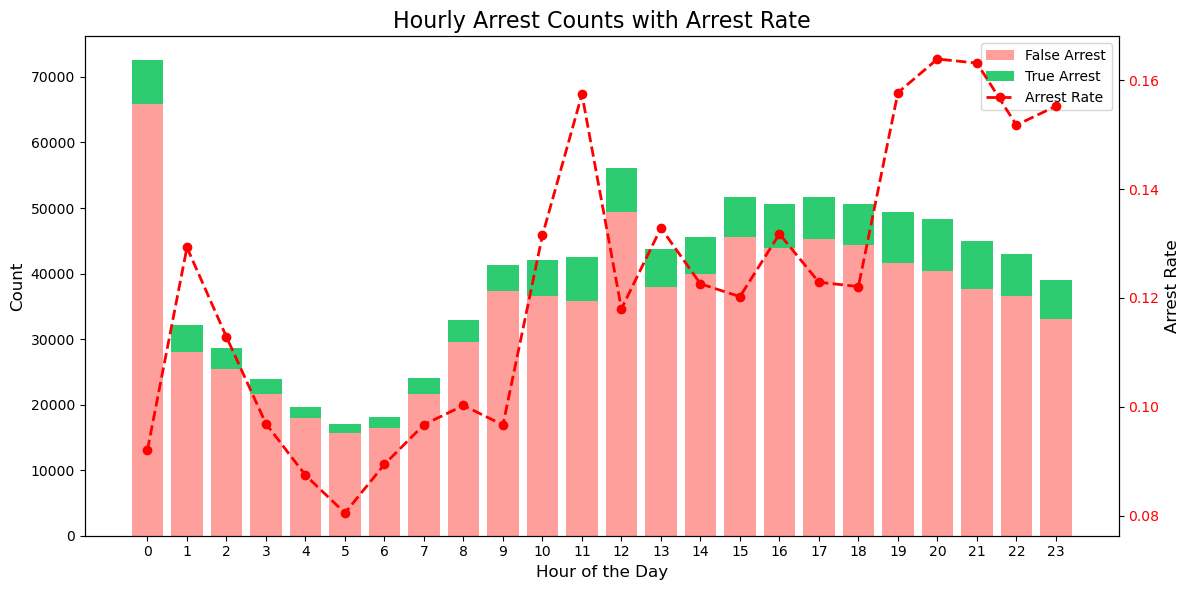

In [83]:
df['hour'] = df['date'].dt.hour

arrest_counts = df.groupby(['hour', 'arrest']).size().unstack(fill_value=0)
arrest_counts = arrest_counts.reindex(columns=[True, False], fill_value=0)

# calcaulate arrest rate per hour
arrest_rate = df.groupby('hour')['arrest'].mean().reset_index()
arrest_rate.columns = ['hour', 'arrest_rate']

fig, ax1 = plt.subplots(figsize=(12, 6))

hours = arrest_counts.index
true_counts = arrest_counts[True]
false_counts = arrest_counts[False]

bar2 = ax1.bar(hours, false_counts, label='False Arrest', color='#ff9f9b')
bar1 = ax1.bar(hours, true_counts, bottom=false_counts, label='True Arrest', color='#2ecc71')
ax1.set_ylabel("Count", fontsize=12)
ax1.tick_params(axis="y", labelcolor="black")

ax1.set_title("Hourly Arrest Counts with Arrest Rate", fontsize=16)
ax1.set_xlabel("Hour of the Day", fontsize=12)

plt.xticks(ticks=range(len(hours)), labels=hours, rotation=0)

ax2 = ax1.twinx()
line, = ax2.plot(
    arrest_rate['hour'],
    arrest_rate['arrest_rate'],
    color="red",
    marker='o',
    linestyle="--",
    linewidth=2,
    label="Arrest Rate"
)
ax2.set_ylabel("Arrest Rate", fontsize=12)
ax2.tick_params(axis="y", labelcolor="red")

lines, labels = ax1.get_legend_handles_labels()
lines += [line]
labels += ["Arrest Rate"]
ax1.legend(lines, labels, loc="upper right")

plt.tight_layout()
plt.show()

### Spatial Distribution Analysis

The spatial analysis reveals that crime locations are not randomly distributed but show clear patterns. The high prevalence of street crimes points to the need for increased patrol efforts and public space surveillance. Similarly, the significant number of apartment-based crimes suggests a need for improved residential security measures and community-based crime prevention programs.

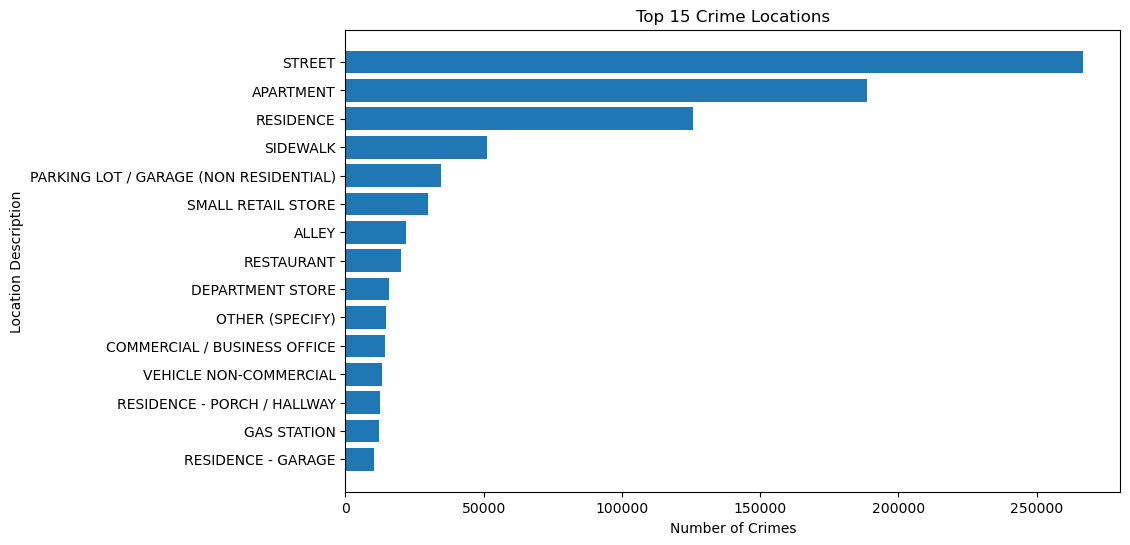

In [84]:
# Group the data by location_description and count occurrences
location_counts = df['location_description'].value_counts()

# Select the top N locations for visualization (e.g., top 15)
top_n = 15
top_locations = location_counts.nlargest(top_n)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.barh(top_locations.index, top_locations.values)
plt.xlabel('Number of Crimes')
plt.ylabel('Location Description')
plt.title('Top {} Crime Locations'.format(top_n))
plt.gca().invert_yaxis()  # Invert y-axis to show the most frequent location at the top
plt.show()


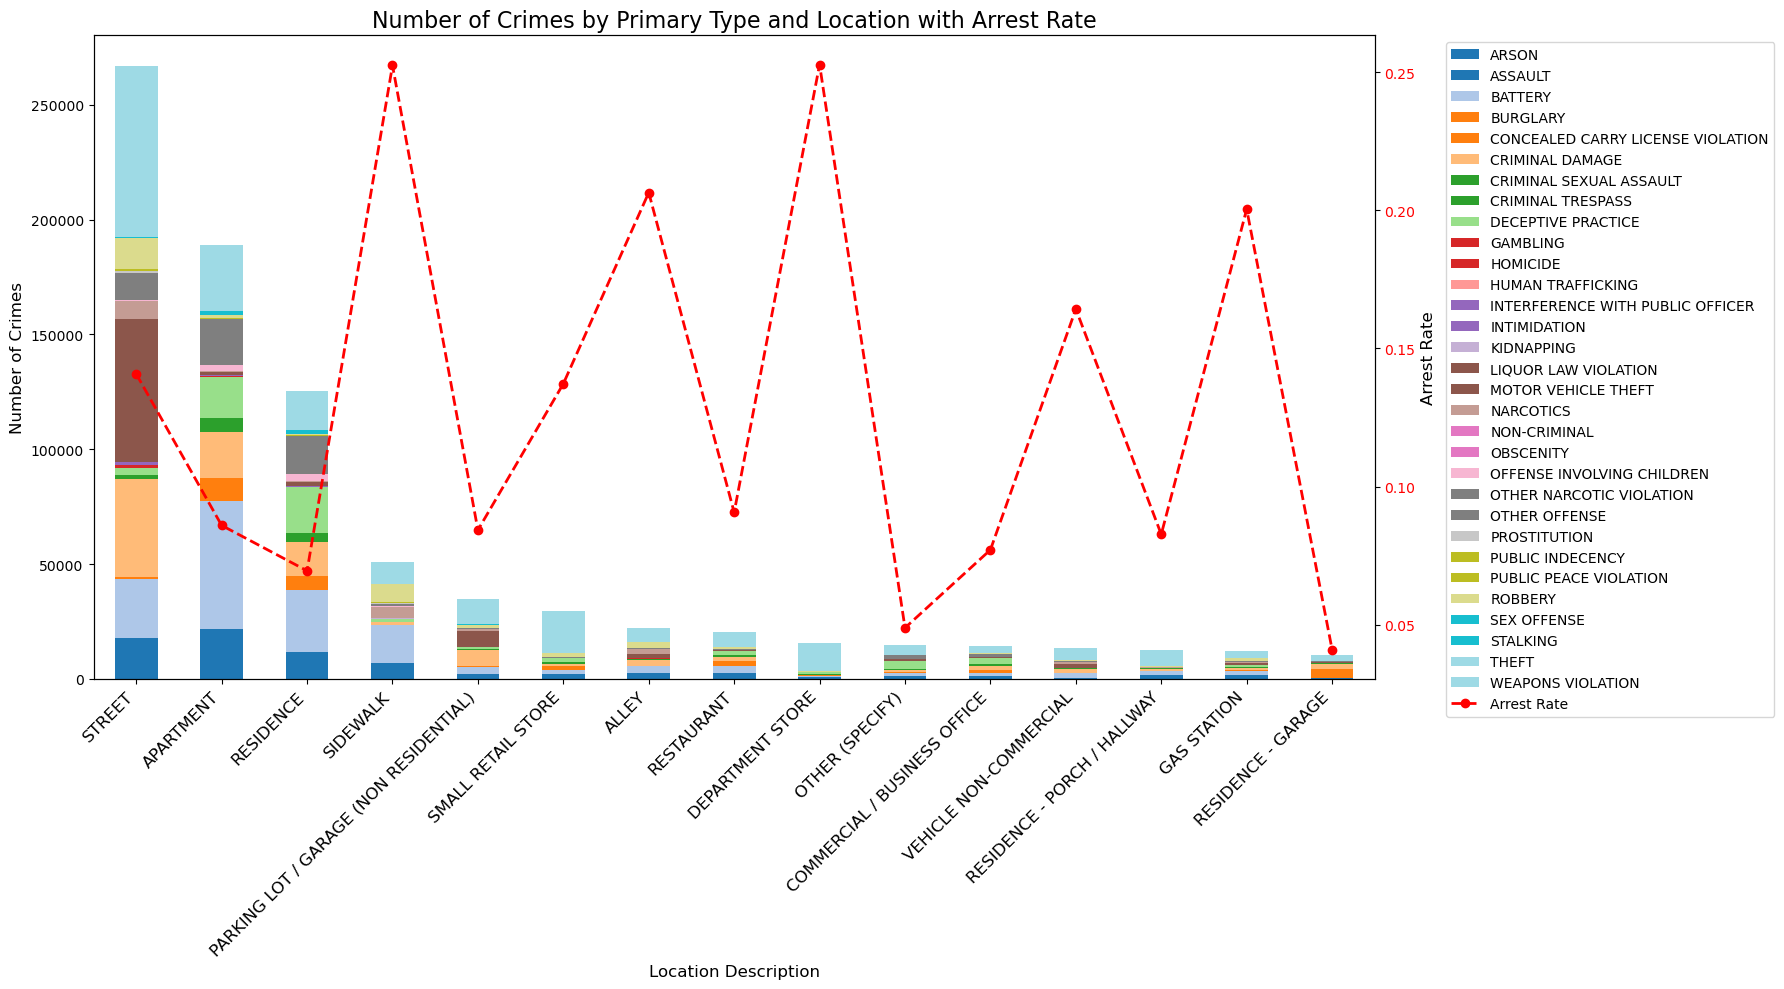

In [85]:
# Group the data by location_description and primary_type, then count occurrences
location_primary_type_counts = df.groupby(['location_description', 'primary_type'])['primary_type'].count().unstack()

# Select the top N locations for visualization (e.g., top 15)
top_n = 15
top_locations = location_primary_type_counts.sum(axis=1).nlargest(top_n).index

# Filter the data to include only the top locations
location_primary_type_counts = location_primary_type_counts.loc[top_locations]

# Step 2: Calculate arrest rate for each location
arrest_stats = df.groupby('location_description').agg(
    total_count=('arrest', 'size'),
    arrested_count=('arrest', lambda x: (x == True).sum())
)
arrest_stats['arrest_rate'] = arrest_stats['arrested_count'] / arrest_stats['total_count']

# Filter arrest stats to include only the top locations
arrest_stats = arrest_stats.loc[top_locations]

# Step 3: Plot the stacked bar chart with a line plot for arrest rate
fig, ax1 = plt.subplots(figsize=(18, 10))

location_primary_type_counts.plot(kind='bar', stacked=True, ax=ax1, colormap='tab20')
ax1.set_xlabel('Location Description', fontsize=12)
ax1.set_ylabel('Number of Crimes', fontsize=12)
ax1.tick_params(axis='y', labelcolor='black')

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, title='Primary Type', bbox_to_anchor=(1.05, 1), loc='upper left', 
           fontsize=8, ncol=2)

ax2 = ax1.twinx()
ax2.plot(
    arrest_stats.index,
    arrest_stats['arrest_rate'],
    color='red',
    linestyle='--',
    linewidth=2,
    marker='o',
    label='Arrest Rate'
)
ax2.set_ylabel('Arrest Rate', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Number of Crimes by Primary Type and Location with Arrest Rate', fontsize=16)

lines, labels = ax1.get_legend_handles_labels()
lines += ax2.get_legend_handles_labels()[0]
labels += ['Arrest Rate']
ax1.legend(lines, labels, bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=12)

plt.tight_layout()

plt.show()

In [86]:
# get crime geo data
crime_geo = df[['primary_type', 'latitude', 'longitude']].dropna()

# get homicides
homicides = crime_geo[(crime_geo['primary_type']=='HOMICIDE')]
homicides['latitude'] = pd.to_numeric(homicides['latitude'], errors='coerce')
homicides['longitude'] = pd.to_numeric(homicides['longitude'], errors='coerce')
# print(homicides.head())

# get kidnappings
kidnappings = crime_geo[(crime_geo['primary_type']=='KIDNAPPING')]
kidnappings['latitude'] = pd.to_numeric(kidnappings['latitude'], errors='coerce')
kidnappings['longitude'] = pd.to_numeric(kidnappings['longitude'], errors='coerce')
# print(kidnappings.head())

# get criminal sexual assaults
sexual_assaults = crime_geo[(crime_geo['primary_type']=='CRIMINAL SEXUAL ASSAULT')]
sexual_assaults['latitude'] = pd.to_numeric(sexual_assaults['latitude'], errors='coerce')
sexual_assaults['longitude'] = pd.to_numeric(sexual_assaults['longitude'], errors='coerce')
# print(sexual_assaults.head())

# get thefts
thefts = crime_geo[(crime_geo['primary_type']=='THEFT')]
thefts['latitude'] = pd.to_numeric(thefts['latitude'], errors='coerce')
thefts['longitude'] = pd.to_numeric(thefts['longitude'], errors='coerce')
# print(thefts.head())

/var/folders/gv/4cnh8blj2mgcj1tbxqms_3yw0000gn/T/ipykernel_3015/3743039291.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homicides['latitude'] = pd.to_numeric(homicides['latitude'], errors='coerce')
/var/folders/gv/4cnh8blj2mgcj1tbxqms_3yw0000gn/T/ipykernel_3015/3743039291.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homicides['longitude'] = pd.to_numeric(homicides['longitude'], errors='coerce')
/var/folders/gv/4cnh8blj2mgcj1tbxqms_3yw0000gn/T/ipykernel_3015/3743039291.py:12: SettingWithCopyWar

Widening the field of view, we can see the crime cases in the whole Chicago.

- Homicide is concentrated in the south and east, and less so in the west.
- Criminal sexual assault occurs mostly in the South and West.
- Theft occurs in all regions.

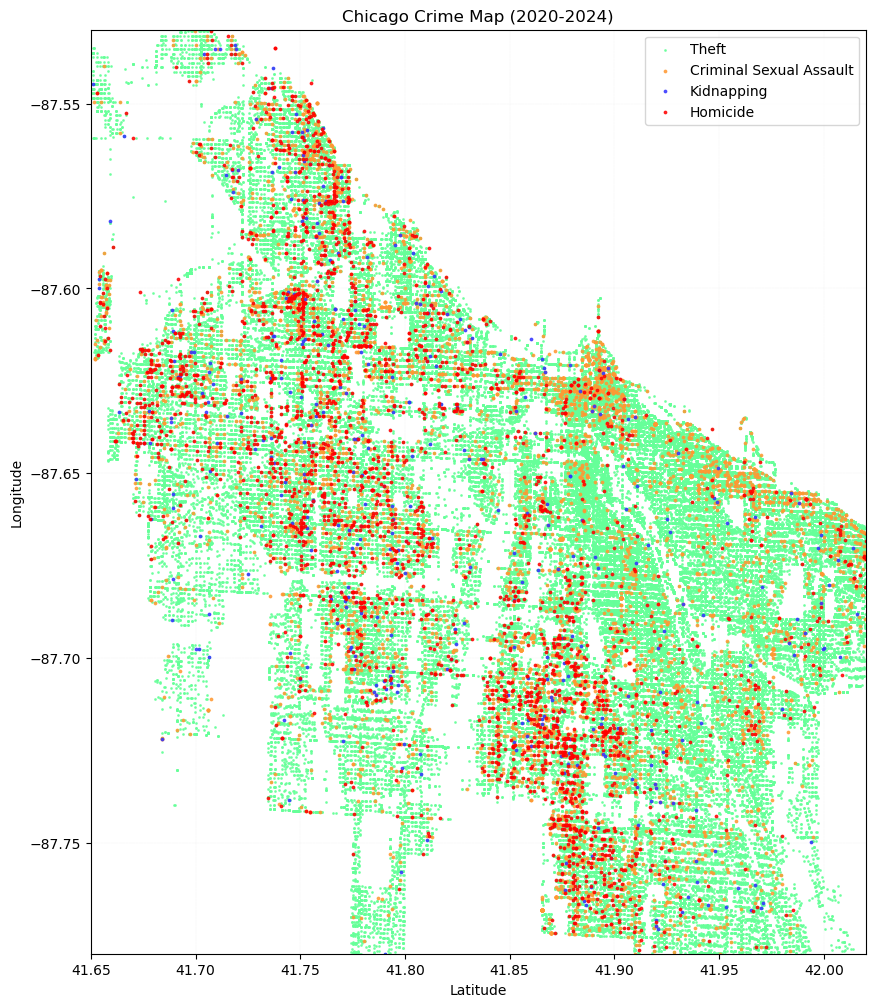

In [87]:
# create scatter map plot
fig,ax= plt.subplots(1, 1, figsize=(10,12))
plt.xlim(41.65, 42.02) # (minLat, maxLat)
plt.ylim(-87.78, -87.53) # (minLong, maxLong)
#ax.set_facecolor('black')

# plot thefts, homicides, kidnappings and sexual assaults
ax.scatter(thefts['latitude'], thefts['longitude'],\
                            s=1, alpha=0.8, color='#66ff99', label='Theft')
ax.scatter(sexual_assaults['latitude'], sexual_assaults['longitude'],\
                            s=3, alpha=0.8, color='#ff9933', label='Criminal Sexual Assault')
ax.scatter(kidnappings['latitude'], kidnappings['longitude'],\
                            s=3, alpha=0.8, color='#3333ff', label='Kidnapping')
ax.scatter(homicides['latitude'], homicides['longitude'],\
                            s=3, alpha=0.8, color='#ff0000', label='Homicide')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Chicago Crime Map (2020-2024)')
plt.legend(loc='upper right', frameon=True)
plt.grid(linestyle = '--', linewidth = 0.05)
plt.show()

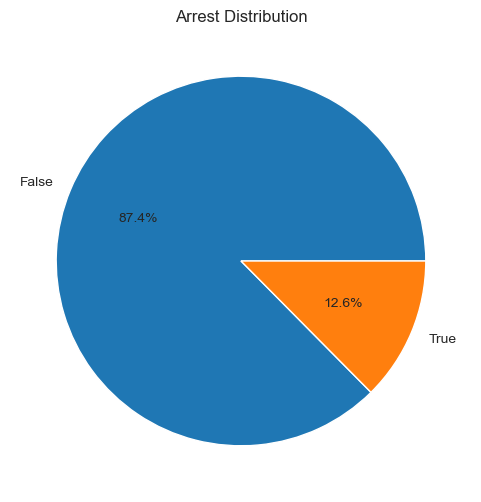

In [88]:
# Check for arrest percentage
arrest_counts = df['arrest'].value_counts()
plt.figure(figsize=(6, 6))
sns.set_style("whitegrid")
plt.pie(arrest_counts, labels=arrest_counts.index, autopct='%1.1f%%')
plt.title("Arrest Distribution")
plt.show()

### Crime Correlation Analysis

**Geographic Correlations**

**Strong Positive Correlations:**
- Beat and district: Expected due to administrative nesting (Beats are fixed geographic areas)
- Y-coordinate and latitude: Perfect alignment in coordinate systems (Y Coordinates represent the North-South position of an incident)
- X-coordinate and longitude: Perfect alignment in coordinate systems (X Coordinates represent the East-West position of an incident)

**Strong Negative Correlations:**
- Community area and y-coordinate: Indicates a north-south trend in community area numbering
- Community area and latitude: Confirms the geographic pattern in community area organization

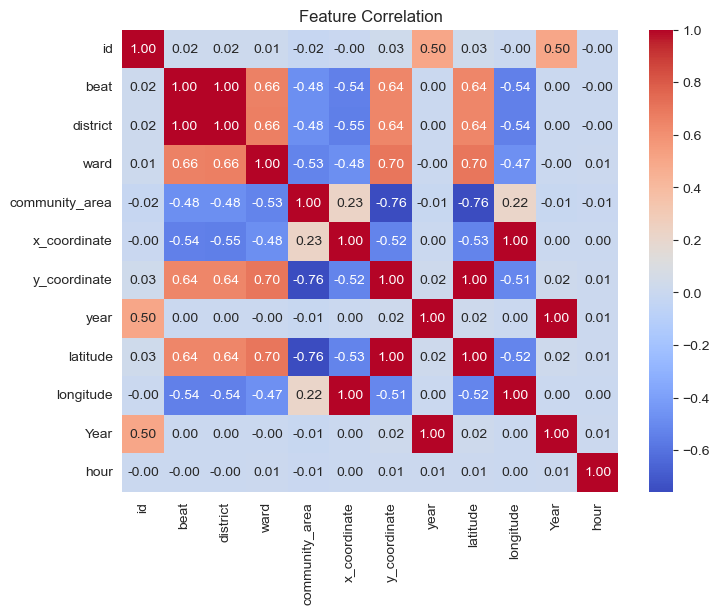

In [94]:
# Correlation heatmap
plt.figure(figsize=(8,6))
numerical_data = data.select_dtypes(include=['number'])
numerical_data.drop(columns=['is_holiday'], inplace=True)
sns.heatmap(numerical_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation")
plt.show()

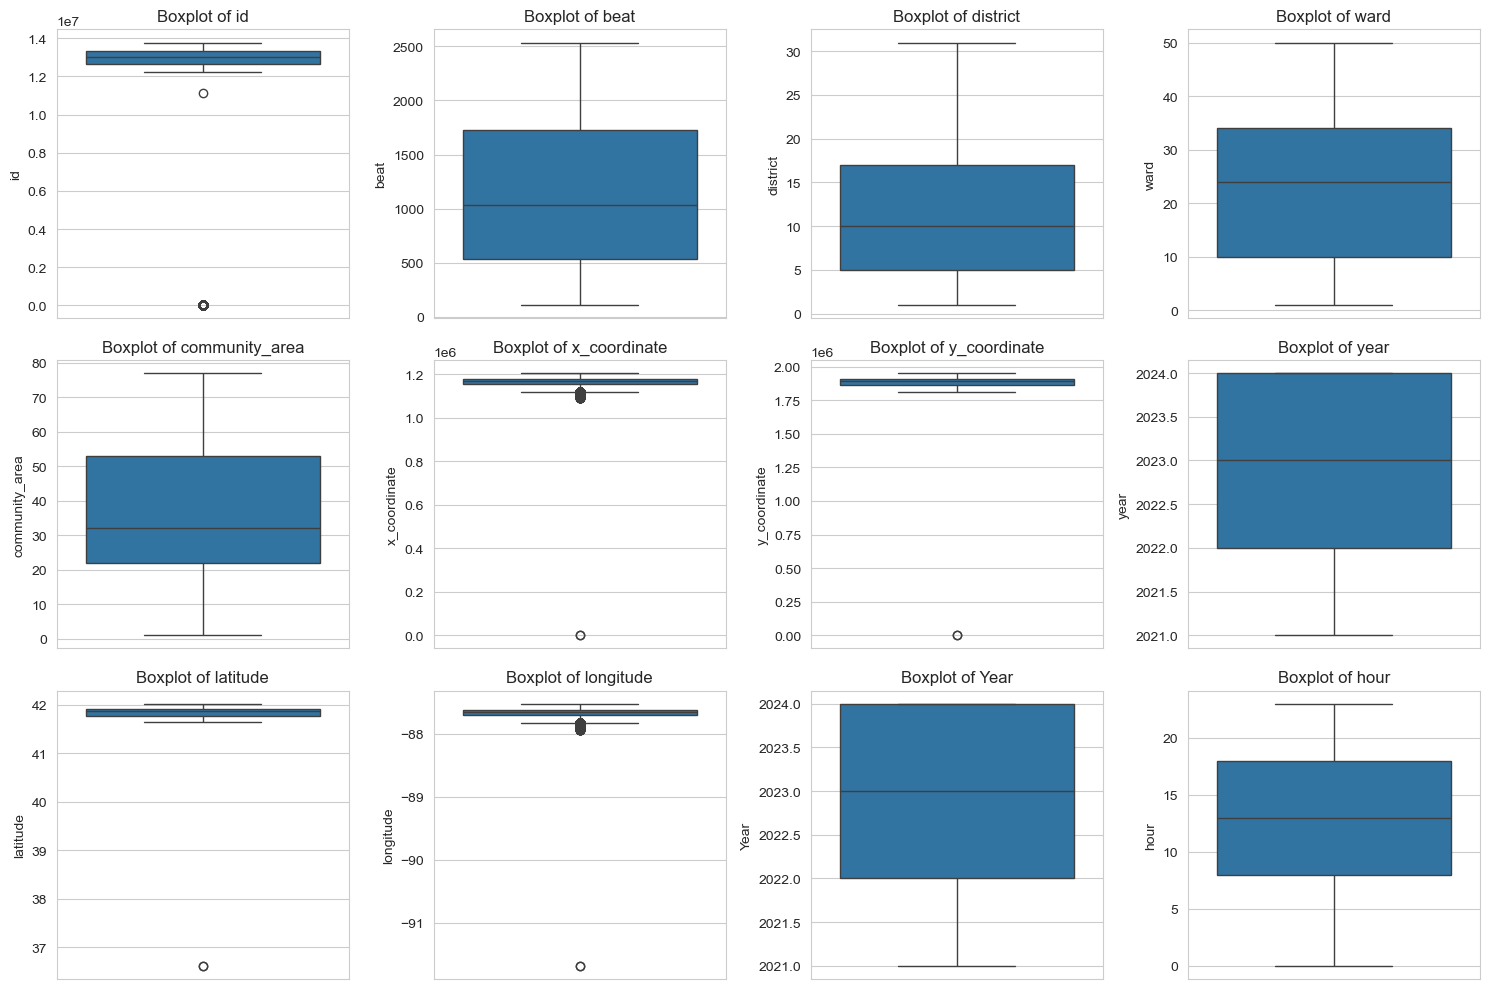

In [95]:
# Plot all numerical features as boxplots
plt.figure(figsize=(15, 10))

# Change the subplot layout to accommodate all columns
for i, col in enumerate(numerical_data):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=numerical_data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

**Crime Type Correlations:**

**Positive Correlations:**
- Theft and motor vehicle theft: It means that there are common underlying factors or perpetrators
- Burglary and theft: It indicates property crime clustering

**Negative Correlations:**
- Criminal damage and narcotics: It implies that they occurred in different 

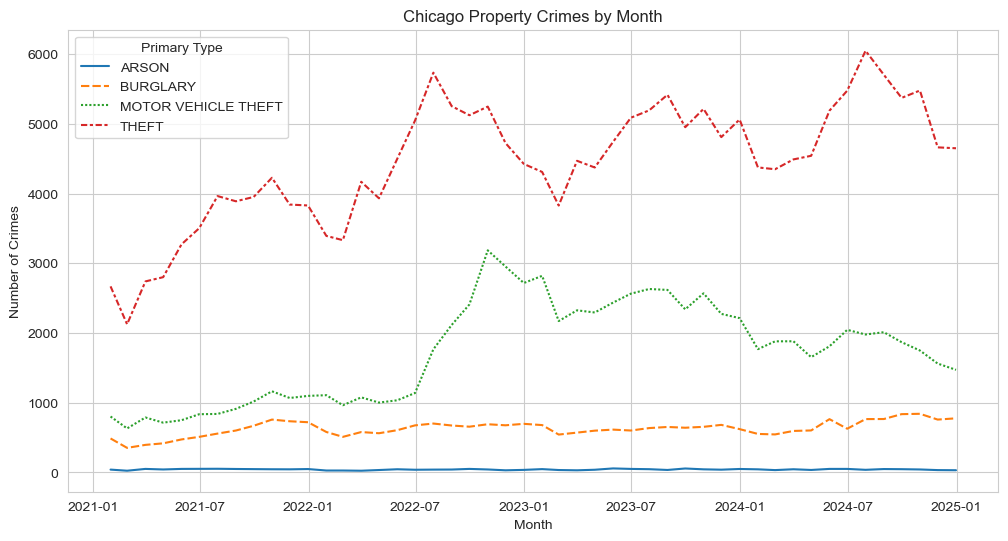

In [96]:
# Classify ARSON, BURGLARY, MOTOR VEHICLE THEFT, THEFT as 'property crimes'
property_crimes = df[df['primary_type'].isin(['ARSON', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'THEFT'])]

# calcaulte the number of property crimes for each month
monthly_property_crime_counts = property_crimes.groupby([pd.Grouper(key='date', freq='M'), 'primary_type']).size().unstack(fill_value=0)

# print(monthly_property_crime_counts)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_property_crime_counts)
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Chicago Property Crimes by Month')
plt.legend(title='Primary Type')
plt.show()

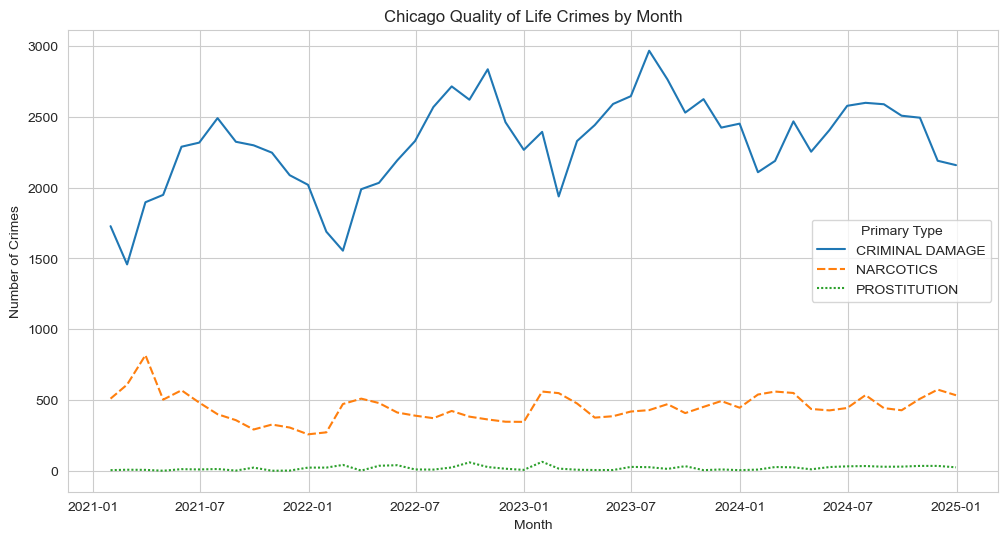

In [97]:
# Classify CRIMINAL DAMAGE, NARCOTICS, PROSTITUTION as 'quality of life crimes'
q_of_life_crimes = df[df['primary_type'].isin(['CRIMINAL DAMAGE', 'NARCOTICS', 'PROSTITUTION'])]

# calcaulte the number of quality of life crimes for each month
monthly_q_of_life_crime_counts = q_of_life_crimes.groupby([pd.Grouper(key='date', freq='M'), 'primary_type']).size().unstack(fill_value=0)

# print(monthly_q_of_life_crime_counts)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_q_of_life_crime_counts)
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Chicago Quality of Life Crimes by Month')
plt.legend(title='Primary Type')
plt.show()